MNIST is a commonly known computer vision dataset, that consists of images of handwritten digits.

These images are all stored as grayscale and have dimensions of 28 by 28 pixels. The dataset as used in this notebook spilt into three groups: train, validate and test. Which consists of respectively 55,000, 5,000 and 10,000 samples. The original datasets can be found at http://yann.lecun.com/exdb/mnist/.

In [1]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf

/Users/widovanheemstra/Virtualenvs/anaconda3/envs/datascience/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


In [5]:
data_dir = "data"

Download and read the datasets as one hot vectors. This means that the target label, indicating the true digit, is codified with a vector of ten positions. The vector consists of zeros only the position, indicating the right digit, contains a 1.

In [7]:
# Import data
mnist = input_data.read_data_sets(data_dir, one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data/t10k-labels-idx1-ubyte.gz


In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

In [27]:
print(mnist.train.images[0].reshape([28, 28]))

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

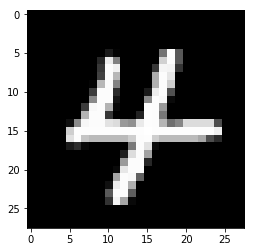

In [22]:
plt.imshow(mnist.train.images[0].reshape([28, 28]), cmap='gray')

In [23]:
mnist.train.labels[0]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

Now we have the data, we can define all elements that are required for the network. In Tensorflow you first need to define all your variables and functions that you need.

In [8]:
# Create the model
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.matmul(x, W) + b

In [9]:
# Define loss and optimizer
y_ = tf.placeholder(tf.float32, [None, 10])

In [10]:
# The raw formulation of cross-entropy,
#
#   tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(tf.nn.softmax(y)),
#                                 reduction_indices=[1]))
#
# can be numerically unstable.
#
# So here we use tf.nn.softmax_cross_entropy_with_logits on the raw
# outputs of 'y', and then average across the batch.
cross_entropy = tf.reduce_mean(
  tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [12]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
# Train
for _ in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

In [13]:
# Test trained model
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: mnist.test.images,
                                  y_: mnist.test.labels}))

0.9184


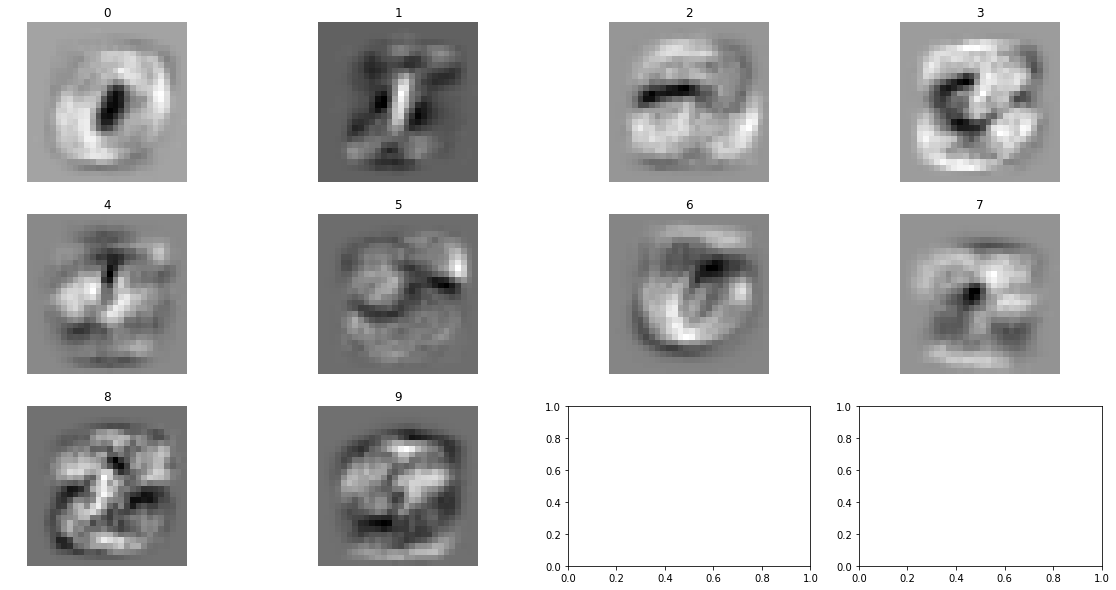

In [42]:
# tensor to numpy conversion
weights = W.eval()

fig, axs = plt.subplots(3, 4, figsize=(20, 10))

for i in range(0, 10):
    axs[(i // 4), (i % 4)].imshow(weights[:, i].reshape([28, 28]), cmap='gray')
    axs[(i // 4), (i % 4)].set_title(i)
    axs[(i // 4), (i % 4)].axis('off')